<a href="https://colab.research.google.com/github/offsouza/yolov5_face_mask_detection/blob/master/yolomask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Mask with YOLOv5



### Download yolo from ultralytics repo




In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

%cd /content/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.57 MiB | 18.28 MiB/s, done.
Resolving deltas: 100% (11541/11541), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-

/content/yolov5


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import torch
#from IPython.display import Image  # for displaying images
#from utils.google_utils import gdrive_download  # for downloading models/datasets

#print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Download face_mask dataset created by roboflow.ai

link: https://public.roboflow.ai/object-detection/mask-wearing/1

But I will make download from my repo on github because don't need login

In [2]:
%cd /content
# Download dataset
!wget https://github.com/offsouza/yolov5_face_mask_detection/raw/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
# Download arquivo.yaml
!wget https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/mask_yolov5s.yaml


/content
--2024-07-30 11:56:19--  https://github.com/offsouza/yolov5_face_mask_detection/raw/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip [following]
--2024-07-30 11:56:19--  https://raw.githubusercontent.com/offsouza/yolov5_face_mask_detection/master/Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3882094 (3.7M) [application/zip]
Saving to: ‘Mask_Wearing.v1-416x416-black-paddin

In [3]:
!unzip -o Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip

Archive:  Mask_Wearing.v1-416x416-black-padding.yolov5pytorch.zip
 extracting: test/images/w1240-p16x9-0e48e0098f6e832f27d8b581b33bbc72b9967a63_jpg.rf.34ed1e8f70eebdabaf43ab9d40dc1c9b.jpg  
 extracting: test/images/RTX7CCFN_jpg.rf.66ed5c5054f30d933d19ab3d56ace004.jpg  
 extracting: test/images/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.0302fefb0879eb37736a704ca5d070ff.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.95f7324cbfd48e0386e0660b5e932223.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.56b50d413464989bb2232448a8fbb915.jpg  
 extracting: test/images/r1p00017o8171pnq407_jpg.rf.6fd25b7219a249e97f54fcabf2b52726.jpg  
 extracting: test/images/w1240-p16x9-2019-10-04t075956z_1862636027_rc15d4d49d00_rtrmadp_3_hongkong-protests_jpg.rf.061f2c7f7d17a0b472510eadb717a0b9.jpg  
 extracting: test/images/w1240-p16x9-fa978043deff83fed485af12d16e39c61398fc30_jpg.rf.185d01b7e55e049c6661b8ecd49679fc.jpg  
 extracting: test/images/1539151332

In [8]:
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 300 --data '../data.yaml' --cfg ../mask_yolov5s.yaml --weights '' --name mask_yolov5s_results --nosave --cache

Streaming output truncated to the last 5000 lines.
      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
  0% 0/7 [00:00<?, ?it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08744    0.05398    0.01458        126        416:  14% 1/7 [00:00<00:01,  3.73it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08593     0.0645    0.01417        197        416:  29% 2/7 [00:00<00:01,  4.54it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     37/299      1.94G    0.08487    0.06271    0.01

In [7]:
# !python train.py  --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt

2024-07-30 12:00:10.155492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 12:00:10.155543: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 12:00:10.156898: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, op

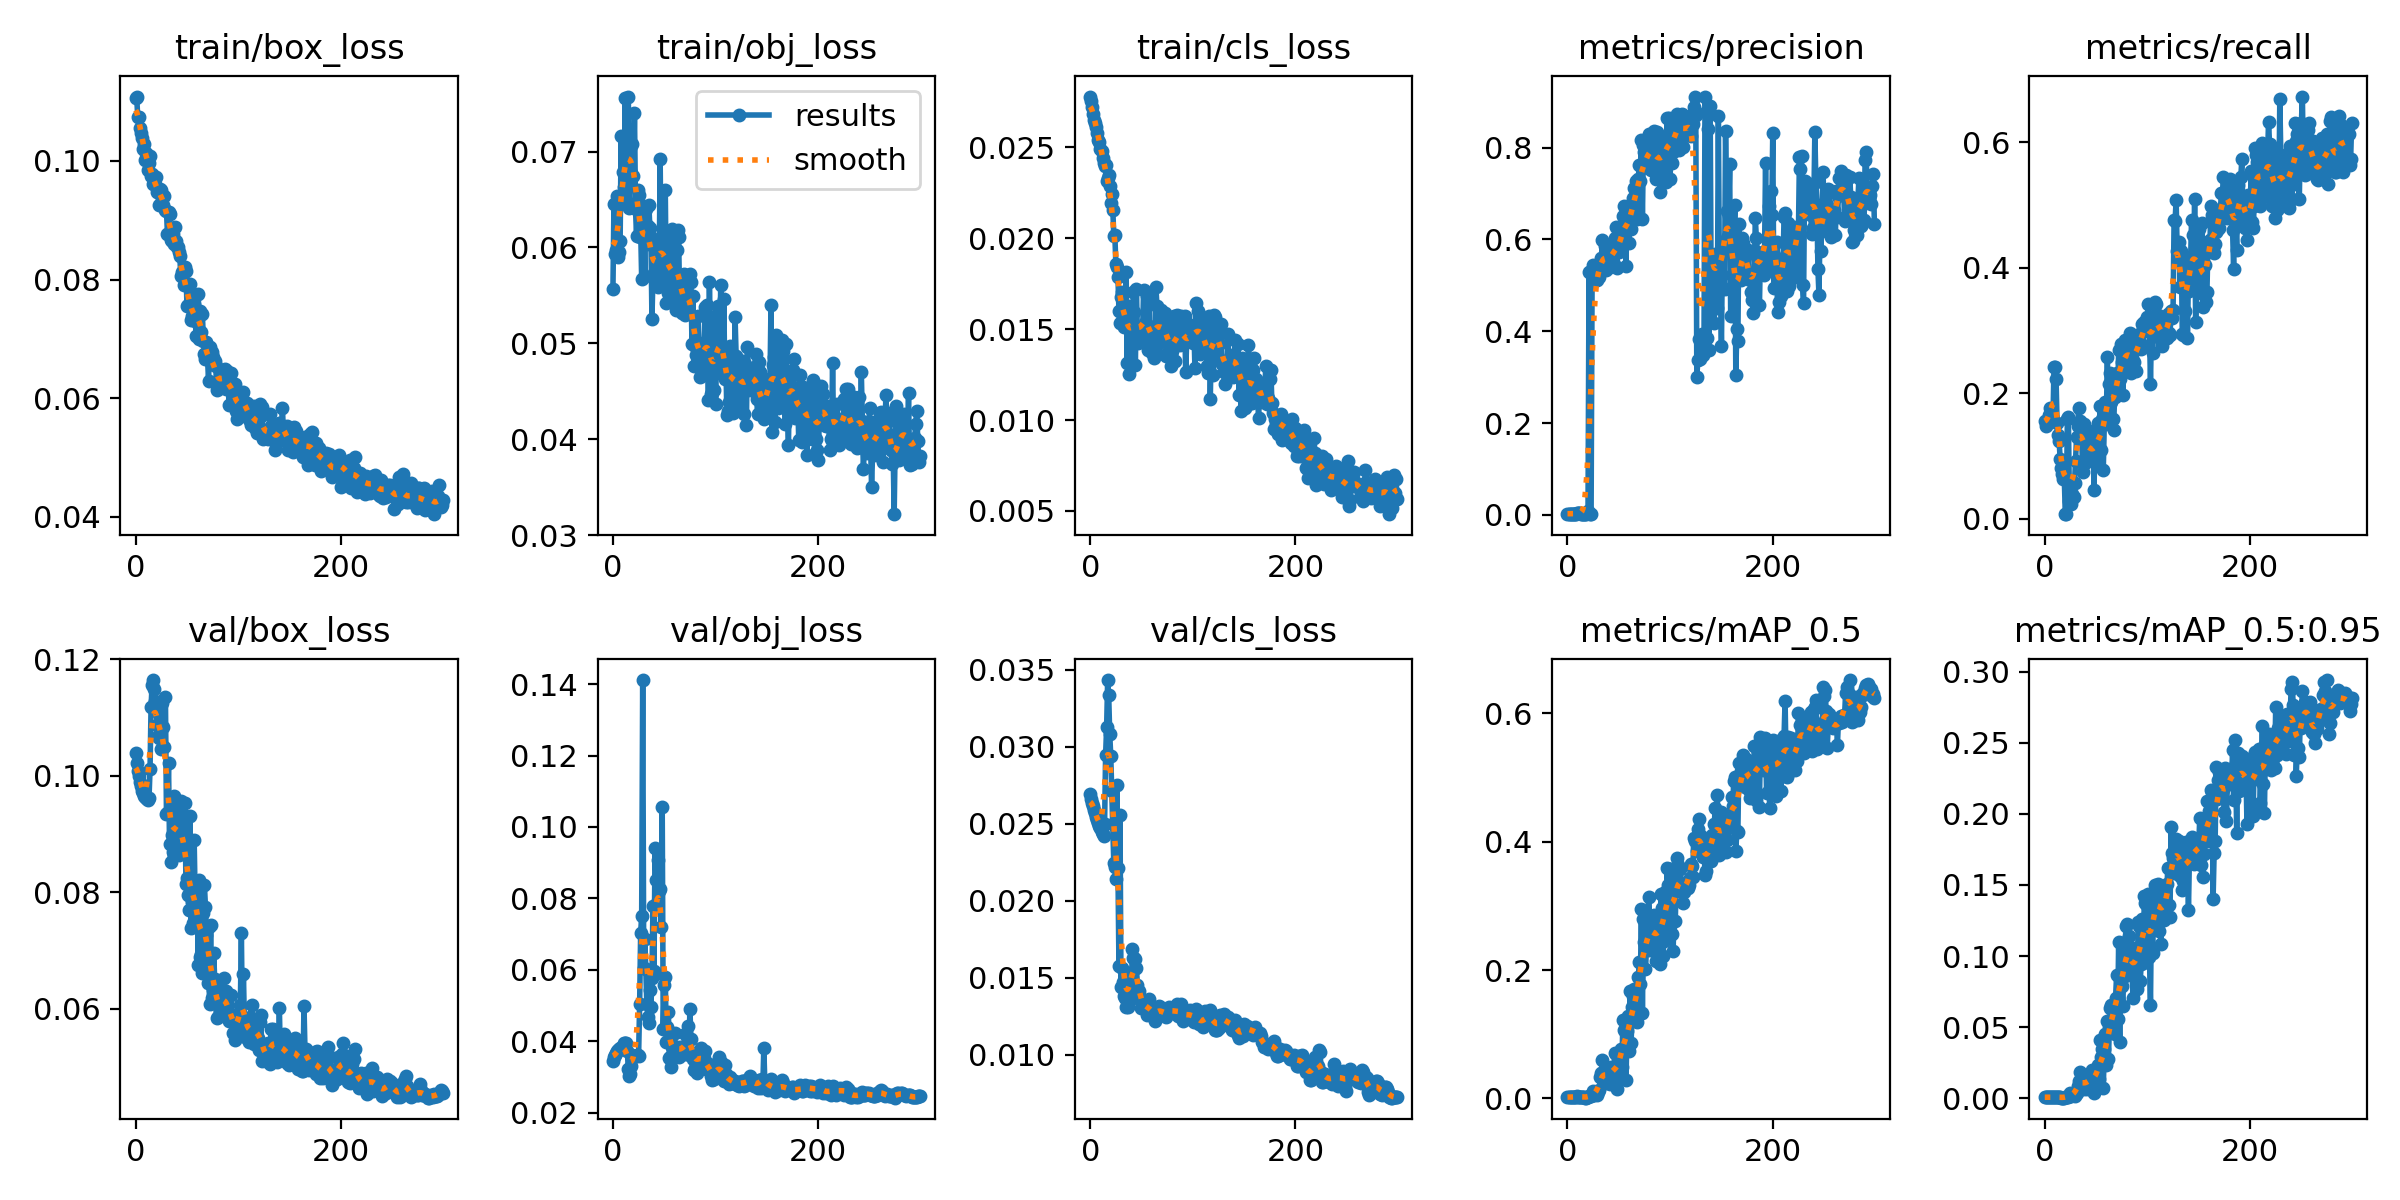

In [11]:
from IPython.display import Image
Image('/content/yolov5/runs/train/mask_yolov5s_results2/results.png')

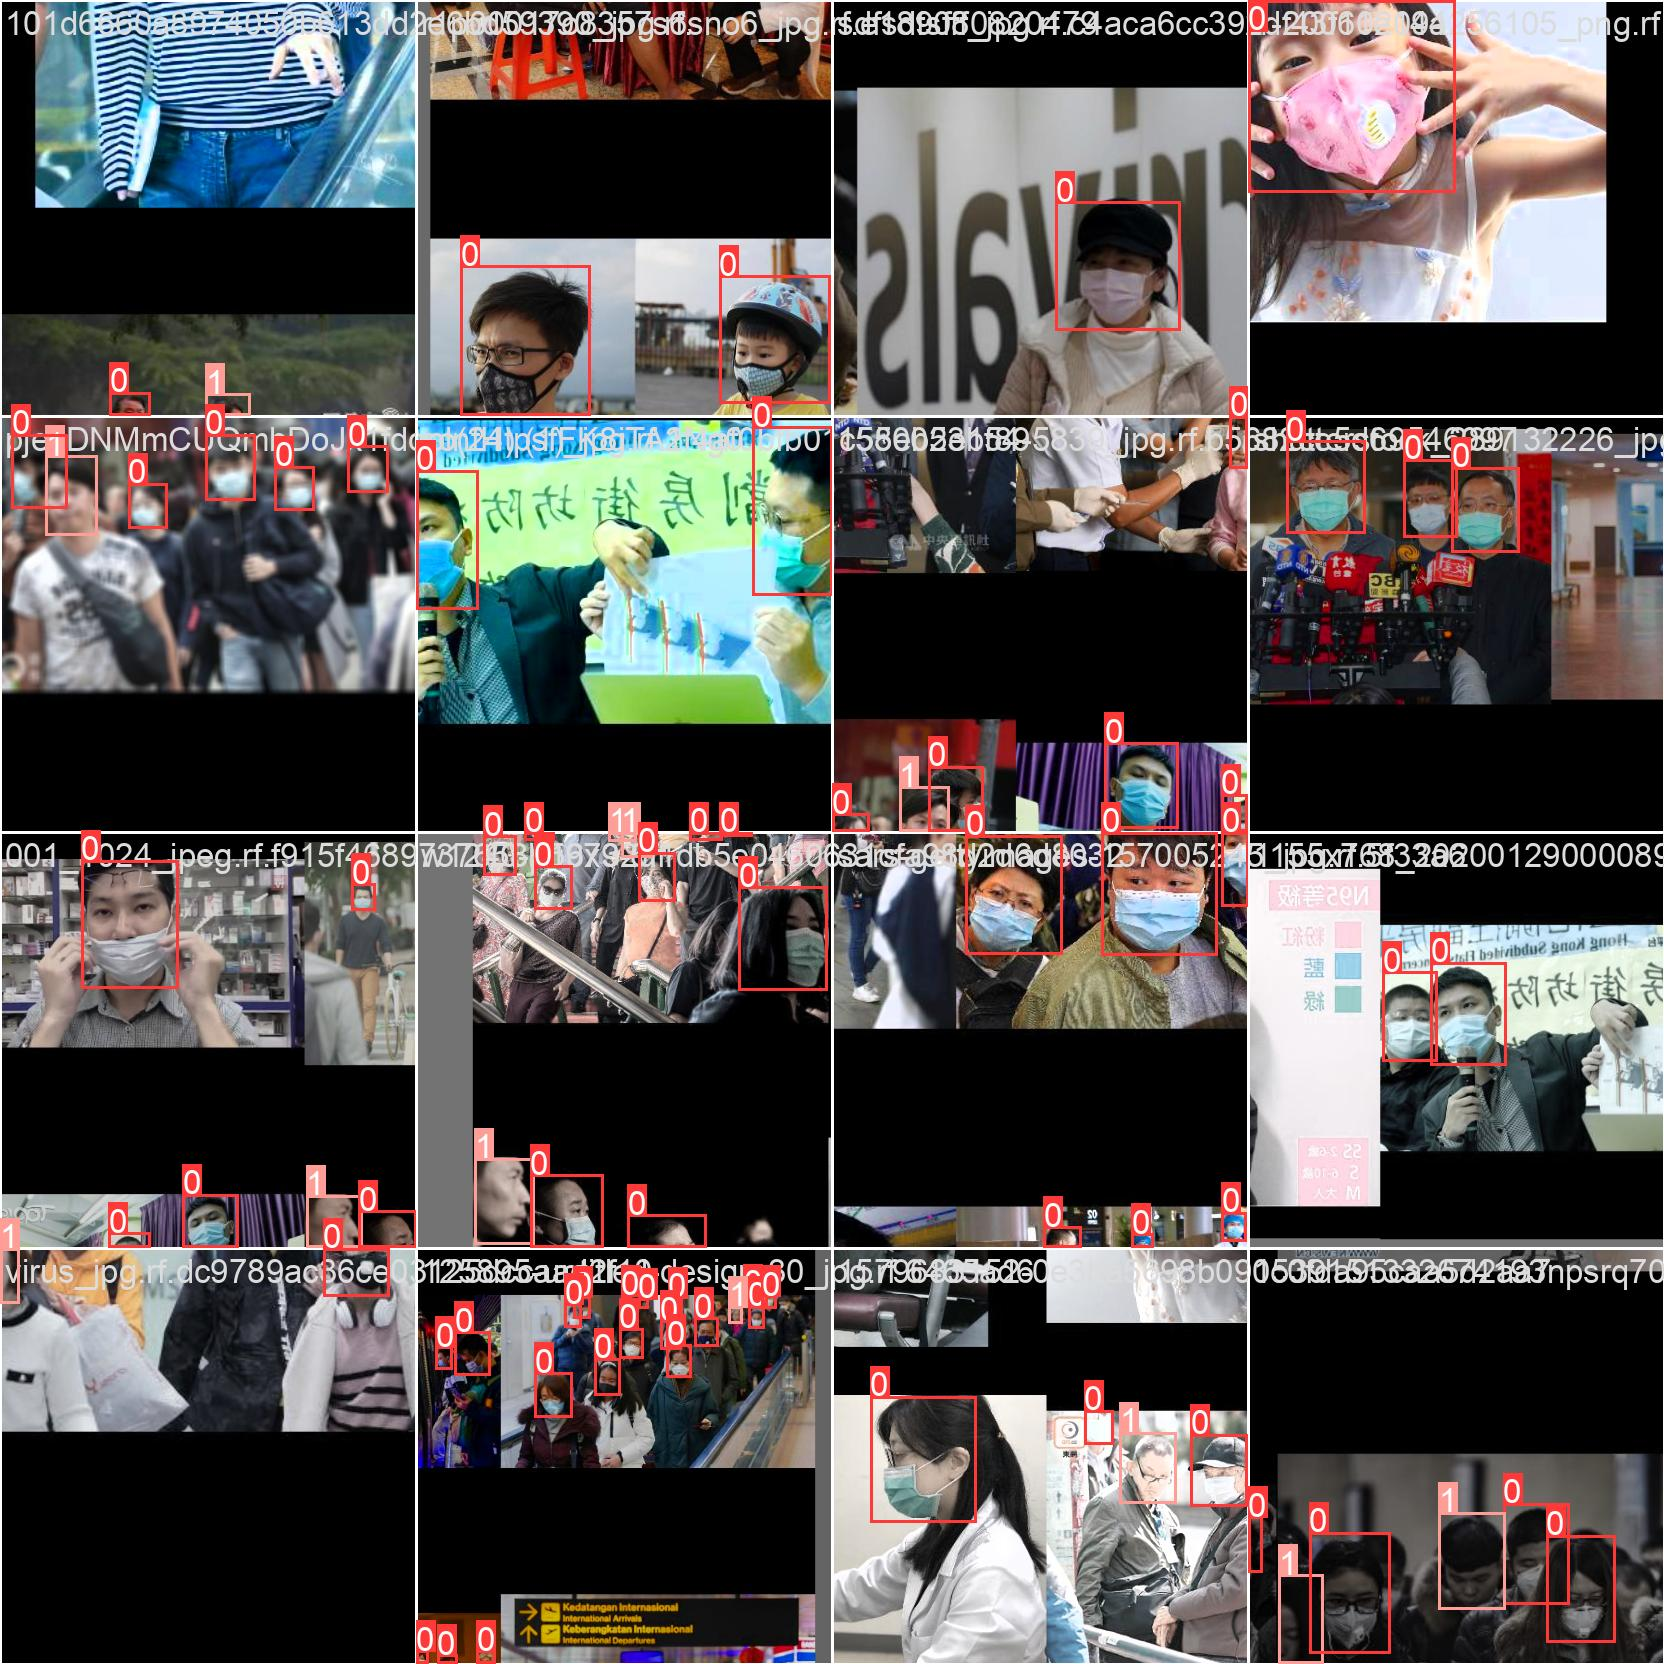

In [12]:
Image('/content/yolov5/runs/train/mask_yolov5s_results2/train_batch2.jpg')

### Testando modelo em uma única imagem

In [13]:
!wget -O /content/mask.png https://nacoesunidas.org/wp-content/uploads/2020/04/mascaras_EUA-e1586353251229.jpg

--2024-07-30 12:14:22--  https://nacoesunidas.org/wp-content/uploads/2020/04/mascaras_EUA-e1586353251229.jpg
Resolving nacoesunidas.org (nacoesunidas.org)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3121::, ...
Connecting to nacoesunidas.org (nacoesunidas.org)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://brasil.un.org/ [following]
--2024-07-30 12:14:23--  https://brasil.un.org/
Resolving brasil.un.org (brasil.un.org)... 13.107.246.67, 2620:1ec:bdf::67
Connecting to brasil.un.org (brasil.un.org)|13.107.246.67|:443... failed: Connection timed out.
Connecting to brasil.un.org (brasil.un.org)|2620:1ec:bdf::67|:443... failed: Cannot assign requested address.
Retrying.

--2024-07-30 12:16:32--  (try: 2)  https://brasil.un.org/
Connecting to brasil.un.org (brasil.un.org)|13.107.246.67|:443... failed: Connection timed out.
Connecting to brasil.un.org (brasil.un.org)|2620:1ec:bdf::67|:443... failed: Cannot assign requested address.

In [19]:
!python detect.py --weights /content/yolov5/runs/train/mask_yolov5s_results2/weights/last.pt --img 416 --conf 0.3 --source /content/mask2.png


detect: weights=['/content/yolov5/runs/train/mask_yolov5s_results2/weights/last.pt'], source=/content/mask2.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
mask_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
image 1/1 /content/mask2.png: 288x416 1 mask, 31.7ms
Speed: 0.4ms pre-process, 31.7ms inference, 498.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2


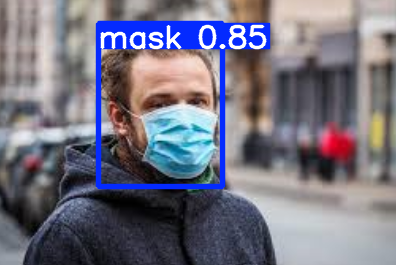

In [20]:
Image('/content/yolov5/runs/detect/exp2/mask2.png')